In [8]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
import os
from linear_regression import LinearRegression
from gradient_descent import GradientDescent, quad, quadGrad
%matplotlib inline

##4.1

In [9]:
def plot(lr,w, plot_sin=True, plot_test=True, plot_validate=True):
    # plot sin(2*phi*x) in green
    x_min = np.amin(lr.x)
    x_max = np.amax(lr.x)
    x = np.linspace(-3,3,1000)
    M = lr.numFeatures - 1
    
    lr_temp = LinearRegression(x,x,lr.numFeatures-1)
    reg_prediction = np.dot(lr_temp.phi,w)
    
    lr_validate = LinearRegression.fromFile(validate_filename, M)
    lr_test = LinearRegression.fromFile(test_filename, M)
    
    plt.plot(x, reg_prediction, color='r')
    
    # the training set is plotted in blue
    plt.scatter(lr.x, lr.y, color='r', marker='o',facecolors='none')
    
    # test set plotted in green
    if plot_test:
        plt.scatter(lr_test.x, lr_test.y, color='g', marker='o',facecolors='none')
        
    # validation set plotted in orange
    if plot_test:
        plt.scatter(lr_validate.x, lr_validate.y, color='b', marker='o',facecolors='none')
              
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

def gradDescentSAE(lr, verbose=False):
    w_initial = 1.0*lr.reg()
    
    res = opt.minimize(lr.SAEwReg, w_initial)
    
    if verbose:
        print " "
        print "--- Scipy Minimization Summary --- "
        print "x_min is = " + str(res.x)
        print "f_min is = " + str(res.fun)
        print "numFunctionCalls = " + str(res.nfev)
    #     print "numIterations = " + str(res.nit)
        print "---------------------------- "
        print " "
        plot(lr,res.x)
    
    return (lr, res.x)


def computeLAD(M, lam, train, test, validate, verbose=True):
    lr_train = LinearRegression.fromFile(train, M)
    lr_validate = LinearRegression.fromFile(validate, M)
    lr_test = LinearRegression.fromFile(test, M)
    
    lr_train.lam = lam
    lr_validate.lam = lam
    lr_test.lam = lam
    
    if verbose:
        (_,w_LAD) = gradDescentSAE(lr_train, verbose=True)
    else:
        (_,w_LAD) = gradDescentSAE(lr_train)
    
    sae_train = lr_train.SAE(w_LAD)
    sae_test = lr_test.SAE(w_LAD)
    sae_validate = lr_validate.SAE(w_LAD)
    
    # For SSE comparison
    sse_train = lr_train.SSE(w_LAD)
    sse_test = lr_test.SSE(w_LAD)
    sse_validate = lr_validate.SSE(w_LAD)
    
    if verbose:
        print "--LAD Statistics--"
        print "M = " + str(M)
        print "w_LAD = " + str(w_LAD)
        print "SAE_train = " + str(sae_train)
        print "SAE_validate = " + str(sae_validate)
        print "SAE_test = " + str(sae_test)
        print ""
        print "SSE_train = " + str(sse_train)
        print "SSE_validate = " + str(sse_validate)
        print "SSE_test = " + str(sse_test)

    
    return (sae_validate, sae_test, sae_train)


def modelSelection(M, showPlot=False):
    sseVal = lambda x: computeLAD(M, x, train_filename, test_filename, validate_filename, verbose=False)[0]
    sseTest = lambda x: computeLAD(M, x, train_filename, test_filename, validate_filename, verbose=False)[1]
    sseTrain = lambda x: computeLAD(M, x, train_filename, test_filename, validate_filename, verbose=False)[2]
    
    sseVal_vec = np.vectorize(sseVal)
    sseTest_vec = np.vectorize(sseTest)
    sseTrain_vec = np.vectorize(sseTrain)
    
    lam_vec = np.linspace(0,10,200)
    a = sseVal_vec(lam_vec)
    b = sseTest_vec(lam_vec)
    c = sseTrain_vec(lam_vec)
    
    lam_min_idx = np.argmin(a)
    lam_min = lam_vec[lam_min_idx]
    
    lr_train = LinearRegression.fromFile(train_filename, M)
    (_,w_LAD) = gradDescentSAE(lr_train)
    w_LAD = lr_train.ridge(lam_min) # NEED TO BE ABLE TO SPECIFY LAMBDA
    

    if showPlot:
#         plt.plot(lam_vec, a, color='b')
#         plt.plot(lam_vec, b, color='g')
        plot(lr_train, w_LAD, plot_sin=False, plot_test=True, plot_validate=True)
        plt.show()
        
    print " "
    print "-------------"
    print "M = " + str(M)
    print "argmin lambda = " + str(lam_min)
    print "SAE_train = " + str(c[lam_min_idx])
    print "SAE_val = " + str(a[lam_min_idx])
    print "SAE_test = " + str(b[lam_min_idx])
    print "----------------"
    print " "


filename = 'regress_train.txt'
M = 1

test_filename = "regress_test.txt"
train_filename = "regress_train.txt"
validate_filename = "regress_validate.txt"


# # Example of just calling gradDescentSAE directly after calling an lr object
# lr = LinearRegression.fromFile(filename, M=1)
# lr.lam = 100
# (lr, w) = gradDescentSAE(lr, verbose=True)

# # Example of calling computeLAD (which in turn calls gradDescentSAE)
# M = 3
# lam = 0.000001
# computeLAD(M, lam, train_filename, test_filename, validate_filename, verbose=True)


for m in range(0,6):
    modelSelection(m, showPlot=False)

 
-------------
M = 0
argmin lambda = 10.0
SAE_train = 17.385913691
SAE_val = 12.9005614711
SAE_test = 17.9849418108
----------------
 
 
-------------
M = 1
argmin lambda = 0.854271356784
SAE_train = 6.33407649931
SAE_val = 2.04479219018
SAE_test = 2.84721155285
----------------
 
 
-------------
M = 2
argmin lambda = 1.10552763819
SAE_train = 6.532373676
SAE_val = 2.08069212959
SAE_test = 3.15848899688
----------------
 
 
-------------
M = 3
argmin lambda = 1.85929648241
SAE_train = 6.34568907842
SAE_val = 4.50212526883
SAE_test = 8.58288844936
----------------
 
 
-------------
M = 4
argmin lambda = 3.56783919598
SAE_train = 8.4774512839
SAE_val = 3.56899778885
SAE_test = 5.23744651349
----------------
 
 
-------------
M = 5
argmin lambda = 8.09045226131
SAE_train = 9.16903771822
SAE_val = 3.43591216046
SAE_test = 9.77045593134
----------------
 


### Plot minimum for each M

 
--- Scipy Minimization Summary --- 
x_min is = [ 0.29999999]
f_min is = 18.2859136078
numFunctionCalls = 15
---------------------------- 
 


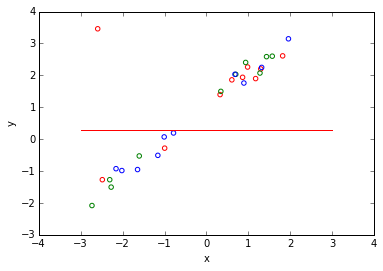

--LAD Statistics--
M = 0
w_LAD = [ 0.29999999]
SAE_train = 17.385913691
SAE_validate = 12.9005614711
SAE_test = 17.9849418108

SSE_train = 34.4929787097
SSE_validate = 22.4889491426
SSE_test = 34.6321478492
 
--- Scipy Minimization Summary --- 
x_min is = [ 1.10280368  0.84883244]
f_min is = 6.29138628172
numFunctionCalls = 200
---------------------------- 
 


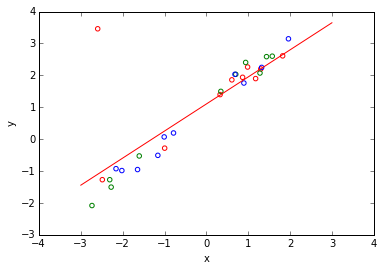

--LAD Statistics--
M = 1
w_LAD = [ 1.10280368  0.84883244]
SAE_train = 6.29138628172
SAE_validate = 3.13794139109
SAE_test = 3.70944731458

SSE_train = 21.38783522
SSE_validate = 1.37695593497
SSE_test = 1.93706261611
 
--- Scipy Minimization Summary --- 
x_min is = [ 1.03583513  0.83556831  0.00845789]
f_min is = 6.59182150835
numFunctionCalls = 245
---------------------------- 
 


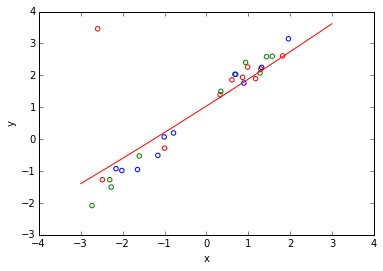

--LAD Statistics--
M = 2
w_LAD = [ 1.03583513  0.83556831  0.00845789]
SAE_train = 6.50281646526
SAE_validate = 3.1046561883
SAE_test = 4.01369987983

SSE_train = 21.2261899176
SSE_validate = 1.36301999887
SSE_test = 2.20507366148
 
--- Scipy Minimization Summary --- 
x_min is = [ 0.35131414  0.42281385  0.22128646  0.12578759]
f_min is = 12.811889833
numFunctionCalls = 347
---------------------------- 
 


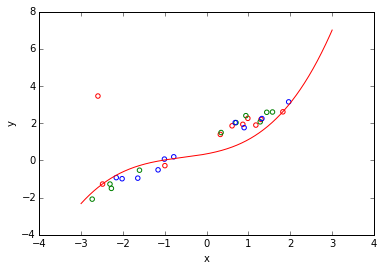

--LAD Statistics--
M = 3
w_LAD = [ 0.35131414  0.42281385  0.22128646  0.12578759]
SAE_train = 10.5804832744
SAE_validate = 4.58722472504
SAE_test = 6.90354728646

SSE_train = 29.3528427166
SSE_validate = 3.40311308007
SSE_test = 6.12106682901
 
--- Scipy Minimization Summary --- 
x_min is = [ 0.54866803  0.70544438  0.21935458  0.04752867 -0.01500857]
f_min is = 11.5075778798
numFunctionCalls = 431
---------------------------- 
 


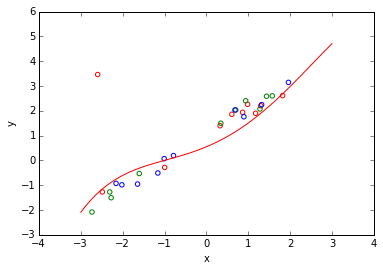

--LAD Statistics--
M = 4
w_LAD = [ 0.54866803  0.70544438  0.21935458  0.04752867 -0.01500857]
SAE_train = 8.4774511214
SAE_validate = 3.56901559091
SAE_test = 5.23745425601

SSE_train = 24.9875844462
SSE_validate = 1.8305418426
SSE_test = 3.375536104
 
--- Scipy Minimization Summary --- 
x_min is = [ 0.2297904   0.32568943  0.13114877  0.376926    0.010206   -0.05182575]
f_min is = 12.9959469816
numFunctionCalls = 428
---------------------------- 
 


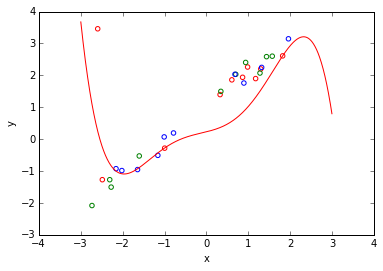

--LAD Statistics--
M = 5
w_LAD = [ 0.2297904   0.32568943  0.13114877  0.376926    0.010206   -0.05182575]
SAE_train = 10.1897334405
SAE_validate = 4.17877285894
SAE_test = 10.5398773553

SSE_train = 17.7152763441
SSE_validate = 3.5254628607
SSE_test = 17.4789271722


(4.178772858941886, 10.539877355311685, 10.189733440521147)

In [10]:
M = 0
lam = 10.0
computeLAD(M, lam, train_filename, test_filename, validate_filename, verbose=True)

M = 1
lam = 0.0
computeLAD(M, lam, train_filename, test_filename, validate_filename, verbose=True)

M = 2
lam = 0.0502512562814
computeLAD(M, lam, train_filename, test_filename, validate_filename, verbose=True)

M = 3
lam = 6.08040201005
computeLAD(M, lam, train_filename, test_filename, validate_filename, verbose=True)

M = 4
lam = 3.56783919598
computeLAD(M, lam, train_filename, test_filename, validate_filename, verbose=True)

M = 5
lam = 8.74371859296
computeLAD(M, lam, train_filename, test_filename, validate_filename, verbose=True)

## 4.2

In [ ]:
(lasso,_,_,_,_) = LinearRegression.fromLASSOData()
np.shape(lasso.phi)


w_reg = lasso.reg()
print w_reg

w = lasso.Lasso(0, w_0=w_reg)
print w
